In [1]:
# import libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define root directory
ICpath = r'C:\Users\joseh\Instacart Basket Analysis'

# import dataset 
ords_prods_merge = pd.read_pickle(os.path.join(ICpath, '02 Data','Prepared Data','orders_products_aggregated.pkl'))
ords_prods_merge.rename(columns={'order_dow':'order_day_of_week'}, inplace=True)
ords_prods_merge

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_from_customer,product_id,add_to_cart_order,reordered,...,department_id,prices,price_label,busiest_day,Busiest_Days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,7,9.0,Mid-range product,Regular busy,regular busy,Most orders,10,New customer,Low spender,Non-frequent customer
1,2398795,1,2,3,7,15.0,False,196,1,1,...,7,9.0,Mid-range product,Regular busy,slowest days,Average orders,10,New customer,Low spender,Non-frequent customer
2,473747,1,3,3,12,21.0,False,196,1,1,...,7,9.0,Mid-range product,Regular busy,slowest days,Most orders,10,New customer,Low spender,Non-frequent customer
3,2254736,1,4,4,7,29.0,False,196,1,1,...,7,9.0,Mid-range product,Least busy,slowest days,Average orders,10,New customer,Low spender,Non-frequent customer
4,431534,1,5,4,15,28.0,False,196,1,1,...,7,9.0,Mid-range product,Least busy,slowest days,Most orders,10,New customer,Low spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,False,43553,2,1,...,7,3.7,Low-range product,Regular busy,regular busy,Most orders,31,Regular customer,Low spender,Frequent customer
32404855,31526,202557,18,5,11,3.0,False,43553,2,1,...,7,3.7,Low-range product,Regular busy,regular busy,Most orders,31,Regular customer,Low spender,Frequent customer
32404856,758936,203436,1,2,7,NaN,True,42338,4,0,...,19,6.9,Mid-range product,Regular busy,regular busy,Average orders,3,New customer,Low spender,Regular customer
32404857,2745165,203436,2,3,5,15.0,False,42338,16,1,...,19,6.9,Mid-range product,Regular busy,slowest days,Fewest orders,3,New customer,Low spender,Regular customer


<AxesSubplot:>

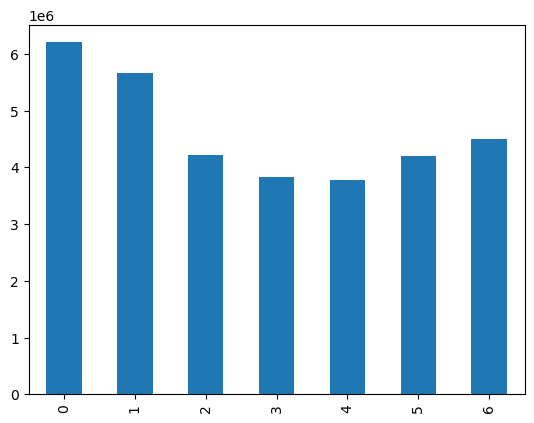

In [12]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

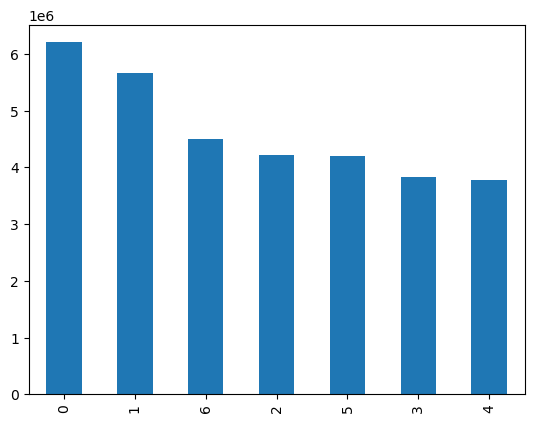

In [17]:
bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar()
bar.figure.savefig(os.path.join(ICpath,'04 Analysis','Visualizations','bar_orders_dow.png.png'))

<AxesSubplot:ylabel='Frequency'>

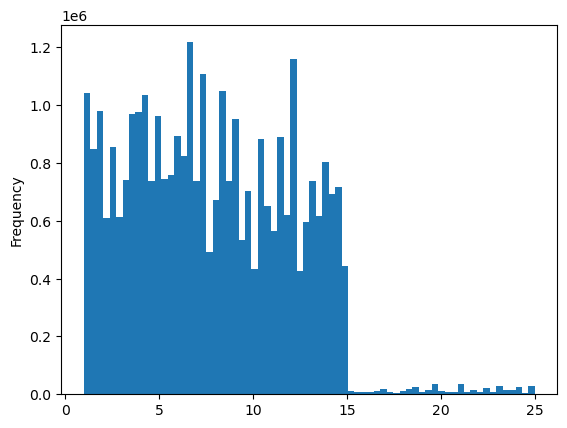

In [26]:
# creating histograms
ords_prods_merge['prices'].plot.hist(bins=70)

In [25]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     7.790483e+00
std      4.241669e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [27]:
np.random.seed(4)
sample70 = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
len(sample70)

32404859

In [31]:
sample70.sum()/len(sample70)

0.7000111001871664

In [53]:
# create a large sample with appx 70% of all entries
large_sample = ords_prods_merge[sample70]

# and a small sample with the remaining appx 30%
small_sample = ords_prods_merge[~sample70]

In [54]:
#checking the size of both samples are complimentary
len(large_sample)+len(small_sample)

32404859

In [56]:
# extract only the columns of interest
df2 = small_sample[['order_day_of_week','prices']]

In [57]:
df2

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32404841,1,8.8
32404842,2,8.8
32404843,0,3.7
32404849,3,3.7


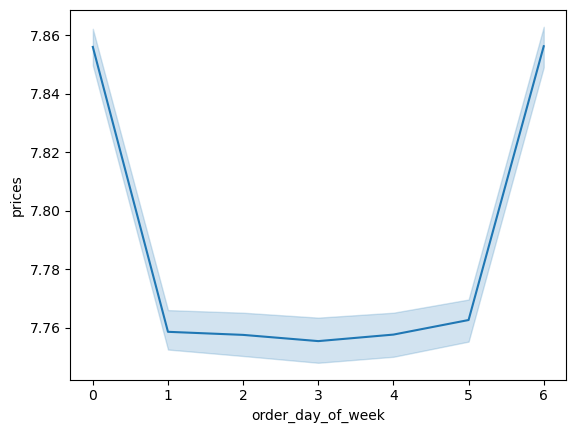

In [61]:
line = sns.lineplot(data = df2, x = 'order_day_of_week', y = 'prices')

In [67]:
df2.groupby('order_day_of_week')['prices'].transform('mean').describe()

count    9.721098e+06
mean     7.790730e+00
std      4.591880e-02
min      7.755491e+00
25%      7.757718e+00
50%      7.758667e+00
75%      7.855977e+00
max      7.856214e+00
Name: prices, dtype: float64

In [69]:
df3 = ords_prods_merge[['order_day_of_week','prices']]

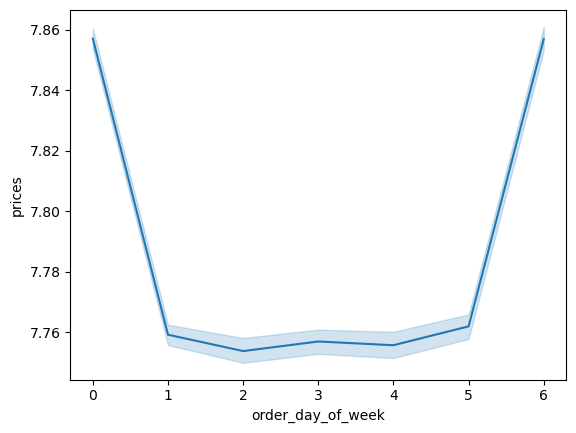

In [70]:
line3 = sns.lineplot( data = df3, x = 'order_day_of_week', y = 'prices')